In [5]:
# import required liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('haberman.csv',names=["age","operation_Year","axil_nodes","survival_status"])
haberman = df
haberman.head()

,age,operation_Year,axil_nodes,survival_status
0,age,year,nodes,status
1,30,64,1,1
2,30,62,3,1
3,30,65,0,1
4,31,59,2,1


In [7]:
# Mentioned double column names, hence remove first row
haberman.drop([0], inplace = True)

In [8]:
# number of data points and features 
haberman.shape

(306, 4)

In [9]:
haberman[['operation_Year','age','axil_nodes','survival_status']] = haberman[['operation_Year','age','axil_nodes','survival_status']].astype(int)

In [10]:
haberman.describe()

,age,operation_Year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [11]:
# quick look at data information for null values and data type.
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 1 to 306
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              306 non-null    int32
 1   operation_Year   306 non-null    int32
 2   axil_nodes       306 non-null    int32
 3   survival_status  306 non-null    int32
dtypes: int32(4)
memory usage: 4.9 KB
None


In [12]:
# number of classes & data points per class
haberman["survival_status"].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

## Obsevations:
1. Total number of observations = 306
2. Total number of features = 4
3. Total number of classes = 2   
    - 1 - patient survived more than 5 years
    - 2 - patient died within 5 years
4. Data points per class: 
    - 1 - 225 patients
    - 2 - 81 patients

Text(0.5, 1.0, 'survival count')

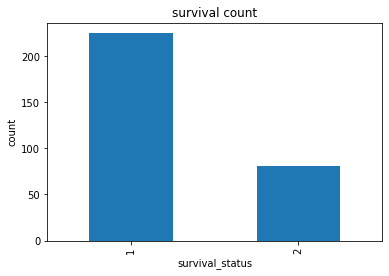

In [13]:
# bar chart for survival status count
df.groupby("survival_status")['survival_status'].count().plot.bar()
plt.ylabel("count")
plt.title("survival count")

# Objective:



##### Classify whether a patient will survive 5 years or more than 5 years from  given 3 features mentioned above.

In [14]:
haberman_survaived = haberman.loc[haberman["survival_status"] == 1];
haberman_died = haberman.loc[haberman["survival_status"] == 2];

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


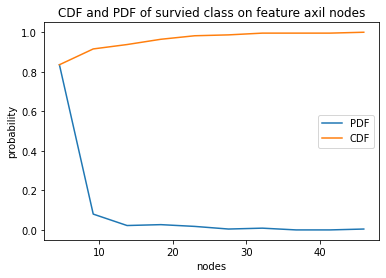

In [15]:
# plot PDF and CDF of axil_nodes for survived people
counts, bin_edges = np.histogram(haberman_survaived['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf, label = "CDF")
plt.title('CDF and PDF of survied class on feature axil nodes')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


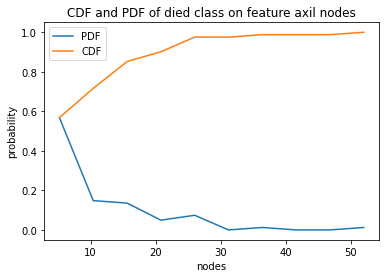

In [16]:
# plot PDF and CDF of axil_nodes for died people
counts, bin_edges = np.histogram(haberman_died['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label = "PDF");
plt.plot(bin_edges[1:], cdf, label = "CDF")
plt.title('CDF and PDF of died class on feature axil nodes')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()
plt.show();

## Observation on PDF and CDF plot
1. By observing CDF of boths survived and died people having nodes less than 5, 85% chances that belongs to class 1 whereas 57% chances that belongs to class 2.

Text(0.5, 1.0, 'PDF for feature axil nodes')

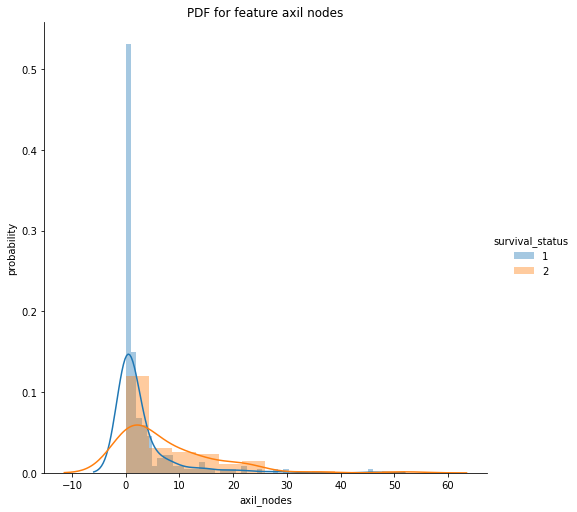

In [17]:
# plot PDF for survived and died people 
sns.FacetGrid(haberman,hue = 'survival_status', size = 7).map(sns.distplot,"axil_nodes").add_legend()
plt.ylabel('probability')
plt.title("PDF for feature axil nodes")

## Observations from PDF of Auxiliary Nodes:
1. If the number of nodes is 0 then patient survives more than 5 years
2. If the number of nodes is less than or equal to 3 the patient has a high chance of survival of more than 5 years and vice versa.

Text(0.5, 1.0, 'box plot on survival status vs nodes')

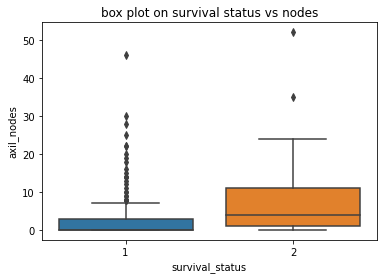

In [18]:
# plot box plot box plot on survival status vs nodes
sns.boxplot(y = "axil_nodes", x = "survival_status", data = haberman, )
plt.title("box plot on survival status vs nodes")

## Observation from box plot on survival status vs nodes
1. Outliers are there in Axil_nodes column
2. Patients having more than 8 positive axial nodes have less probability of survival.

Text(0.5, 1.0, 'box plot on survival status vs age')

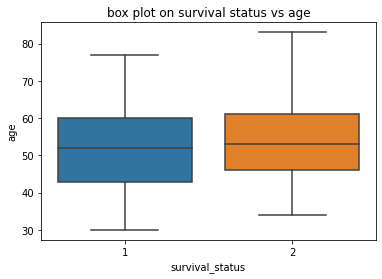

In [19]:
# box plot on box plot on survival status vs age
sns.boxplot(y = "age", x = "survival_status", data = haberman, )
plt.title("box plot on survival status vs age")

Text(0.5, 1.0, 'box plot on survival status vs operation year')

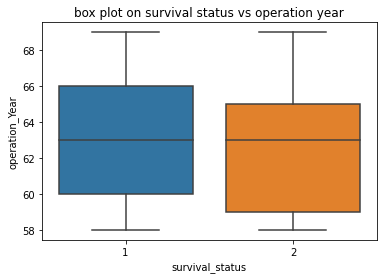

In [20]:
# box plot on box plot on survival status vs age
sns.boxplot(y = "operation_Year", x = "survival_status", data = haberman, )
plt.title("box plot on survival status vs operation year")

## Observation from box plot on survival status vs operation year
1. The patients treated after 1965 have the slighlty higher chance to surive that the rest. 
2. The patients treated before 1960 have slighlty lower chance to surive that the rest.

Text(0.5, 1.0, 'violin plot on survival status vs nodes')

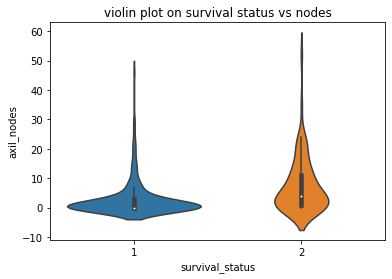

In [21]:
# plot violin plot on survival status vs nodes
sns.violinplot(y = "axil_nodes", x = "survival_status", data = haberman, size = 10)
plt.title("violin plot on survival status vs nodes")

### Bivariate analysis 

Text(0.5, 1.0, 'nodes vs survival status')

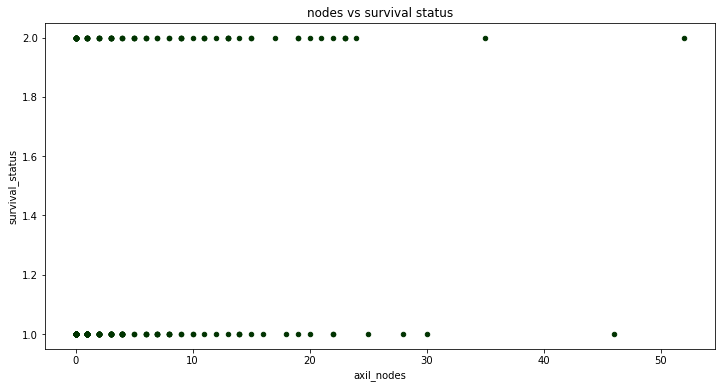

In [22]:
# plot scatter plot nodes vs survival status
haberman.plot(kind = 'scatter', x = 'axil_nodes', y = 'survival_status',color=(0,0.2,0), figsize = (12,6) )
plt.title("nodes vs survival status")

Text(0.5, 1.0, 'age vs survival status')

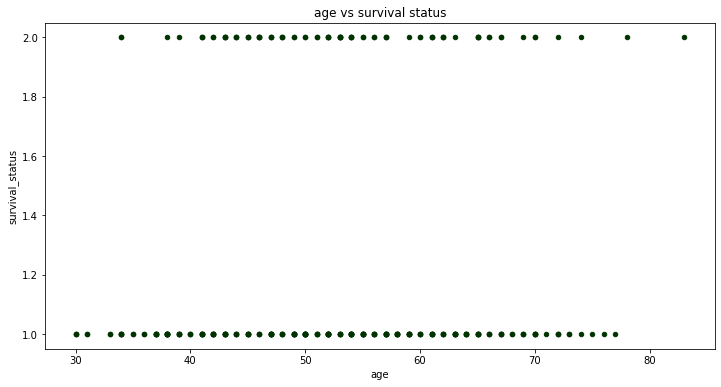

In [23]:
# plot scatter plot age vs survival status
haberman.plot(kind = 'scatter', x = 'age', y = 'survival_status',color=(0,0.2,0), figsize = (12,6) )
plt.title("age vs survival status")

Text(0.5, 1.0, 'age vs nodes')

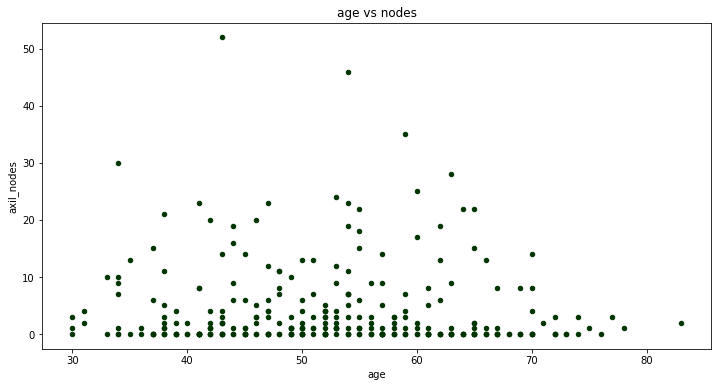

In [24]:
# plot scatter plot nodes vs age
haberman.plot(kind = 'scatter', x = 'age', y = 'axil_nodes',color=(0,0.2,0), figsize = (12,6) )
plt.title("age vs nodes")

## Observations from Scatter Plots
1. Maximum patients have less than 10 nodes
2. Patients who have the age of 40 to 60 might have higher number of nodes

Text(0.5, 1.0, ' pair plot')

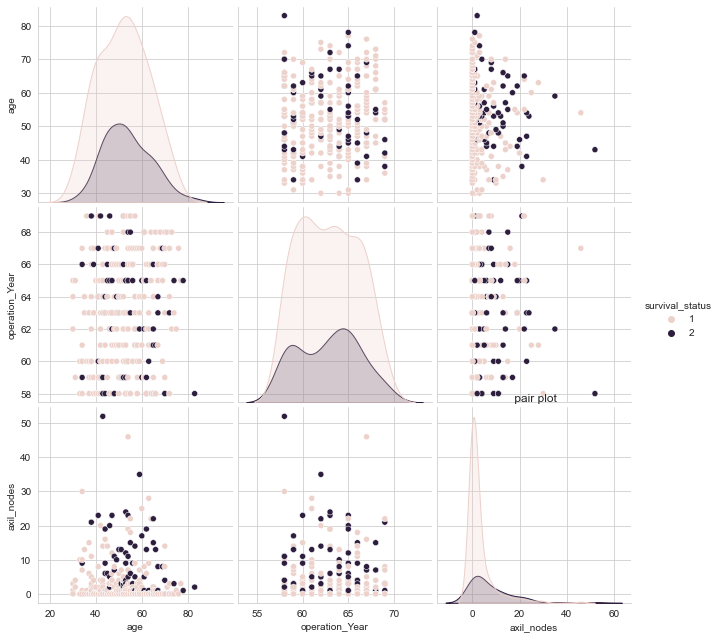

In [25]:
# plot pair plot
sns.set_style("whitegrid")
sns.pairplot(haberman, hue="survival_status", height=3);
plt.title(" pair plot")

## Observation from pair plot
1. From above pair plots we can see that the classes of Survival_Status are not lineraly separable if only two features are considered and pair plot does not give any idea of decision boundary.

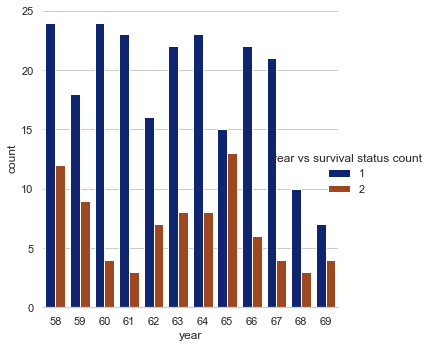

In [26]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=haberman, kind= "count",
    x="operation_Year", hue="survival_status",
    ci="sd", palette="dark", alpha=1, height=5
)
g.despine(left=True)
g.set_axis_labels("year", "count")
g.legend.set_title("year vs survival status count")

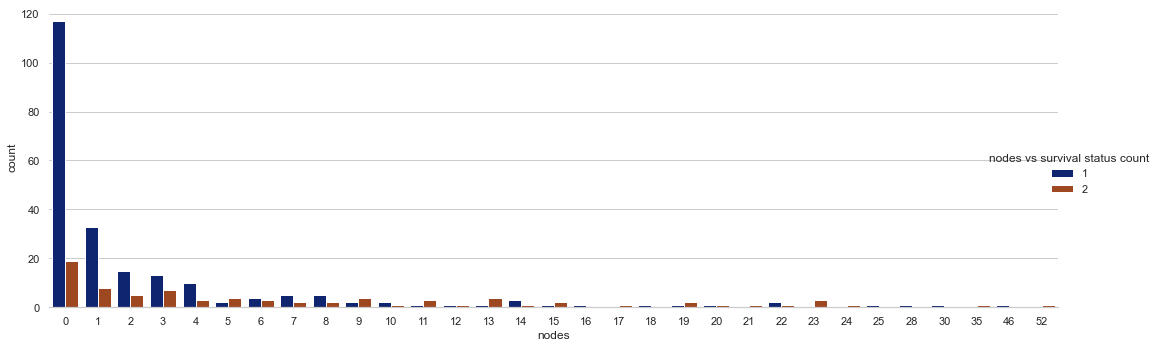

In [27]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=haberman, kind= "count",
    x="axil_nodes", hue="survival_status",
    ci="sd", palette="dark", alpha=1, height=5, aspect = 3
)
g.despine(left=True)
g.set_axis_labels("nodes", "count")
g.legend.set_title("nodes vs survival status count")

In [28]:
survived_patients_having_nodes_below_9 = haberman[(haberman['axil_nodes'] < 9) & (haberman['survival_status'] == 1) ].value_counts().sum()
died_patients_having_nodes_below_9 = haberman[(haberman['axil_nodes'] < 9) & (haberman['survival_status'] == 2) ].value_counts().sum()
survivel_patients_ratio_having_nodes_below_9 = (survived_patients_having_nodes_below_9 / (survived_patients_having_nodes_below_9 + died_patients_having_nodes_below_9 )) * 100
print("survivel_patients_ratio_having_nodes_below_9 = ",int(survivel_patients_ratio_having_nodes_below_9), "%")
survived_patients_having_nodes_above_9 = haberman[(haberman['axil_nodes'] > 9) & (haberman['survival_status'] == 1) ].value_counts().sum()
died_patients_having_nodes_above_9 = haberman[(haberman['axil_nodes'] > 9) & (haberman['survival_status'] == 2) ].value_counts().sum()
survivel_patients_ratio_having_nodes_above_9 = (survived_patients_having_nodes_above_9 / (survived_patients_having_nodes_above_9 + died_patients_having_nodes_above_9 )) * 100
print("\nsurvivel_patients_ratio_having_nodes_above_9 = ",int(survivel_patients_ratio_having_nodes_above_9),"%")

survivel_patients_ratio_having_nodes_below_9 =  79 %

survivel_patients_ratio_having_nodes_above_9 =  44 %


## Observation
1. survivel patients ratio having nodes below 9 =  79 %
2. survivel patients ratio having nodes above 9 =  44 %

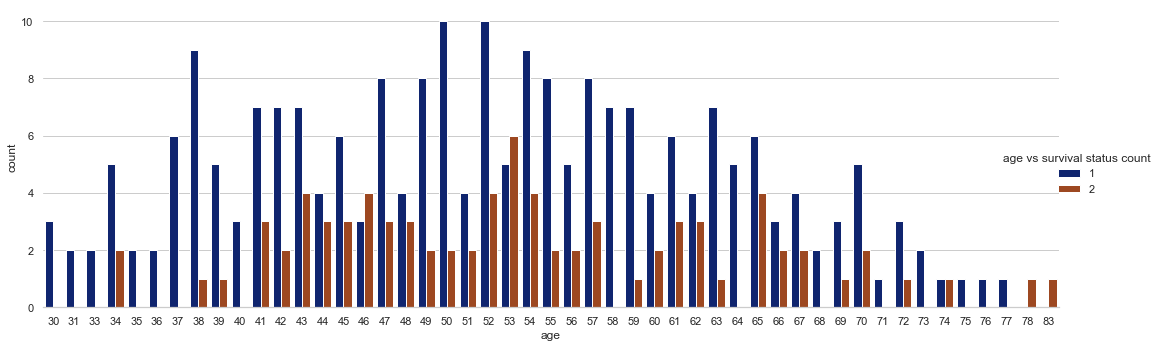

In [29]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=haberman, kind= "count",
    x="age", hue="survival_status",
    ci="sd", palette="dark", alpha=1, height=5, aspect = 3
)
g.despine(left=True)
g.set_axis_labels("age", "count")
g.legend.set_title("age vs survival status count")

In [30]:
patient_survived_below_age_40 = haberman[(haberman['age'] <= 40) & (haberman['survival_status'] == 1) ].value_counts().sum()
patient_died_below_age_40 = haberman[(haberman['age'] <= 40) & (haberman['survival_status'] == 2) ].value_counts().sum()
survival_ratio_of_patient_below_age_40 = (patient_survived_below_age_40 / (patient_survived_below_age_40 + patient_died_below_age_40)) * 100
print("survival_ratio_of_patient_below_age_40 = ",int(survival_ratio_of_patient_below_age_40),"%")
patient_survived_above_age_40 = haberman[(haberman['age'] > 40) & (haberman['survival_status'] == 1) ].value_counts().sum()
patient_died_above_age_40 = haberman[(haberman['age'] > 40) & (haberman['survival_status'] == 2) ].value_counts().sum()
survival_ratio_of_patient_above_age_40 = (patient_survived_above_age_40 / (patient_survived_above_age_40 + patient_died_above_age_40)) * 100
print("\nsurvival_ratio_of_patient_above_age_40 = ",int(survival_ratio_of_patient_above_age_40),"%")

survival_ratio_of_patient_below_age_40 =  90 %

survival_ratio_of_patient_above_age_40 =  70 %


## Observation
1. survival ratio of patient below age 40 =  90 %
2. survival ratio of patient above age 40 =  70 %

# Overall Conclusion
### From PDF's and CDF's:
1. nodes are the most important feature for the classification.
2. By observing CDF of boths survived and died people having nodes less than 5, there are 85% chances that belongs to class 1 whereas 57% chances that belongs to class.

### From pair plots and scatter plots:
1. pair plot does not give any idea of decision boundary, if only two features are considered.
2. Maximum patients have less than 10 nodes.
3. Patients who have the age of 40 to 60 might have higher number of nodes.

### From box and violin plots:
1. The patients treated after 1965 have the slighlty higher chance to surive that the rest.
2. The patients treated before 1960 have slighlty lower chance to surive that the rest.

### From catplots:
1. survivel patients ratio having nodes below 9 is = 79 %
2. survivel patients ratio having nodes above 9 is = 44 %
3. survival ratio of patient below age 40 is = 90 %
4. survival ratio of patient above age 40 is = 70 %
1. from given 3 features we can not 100 % classify survival status, but we can classify it's probability that paitent belongs to which class.   
